In [94]:
import os

# Define the path to the training set directory
train_path = "D:\Deep Learning\Projects\Datasets\Cat_Dog"

# Initialize the counter
file_count = 0

# Walk through all directories and subdirectories in the specified path
for root, dirs, files in os.walk(train_path):
    file_count += len(files)

print("Number of images: ", file_count)

Number of images:  8005


In [5]:
#Importing the dependencies

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

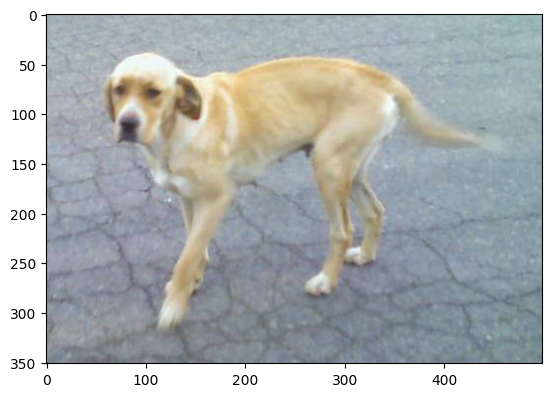

In [11]:
#Displayying the images of cats and dogs
# Corrected path with raw string to handle backslashes or using double backslashes
img_path = r"D:\Deep Learning\Projects\Datasets\Cat_Dog\dog.3314.jpg"

# Read the image
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.show()


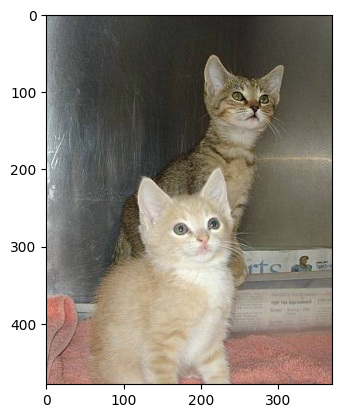

In [12]:
img_path=r"D:\Deep Learning\Projects\Datasets\Cat_Dog\cat.27.jpg"
# Read the image
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.show()


In [13]:
file_names=os.listdir('D:/Deep Learning/Projects/Datasets/Cat_Dog')
dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 4005
Number of cat images = 4001


In [23]:
#Resizing the image

os.mkdir("D:/Deep Learning/Projects/Datasets/Cat_Dog_resized")
original_folder= "D:/Deep Learning/Projects/Datasets/Cat_Dog"
resized_folder= "D:/Deep Learning/Projects/Datasets/Cat_Dog_resized"

In [24]:
new_size = (224, 224)  # You can change this to your required size

# Process each file in the original folder
for i in range(8000):
    file_name = os.listdir(original_folder)[i]
    img_path = os.path.join(original_folder, file_name)
    
    # Open the image, resize, and save
    img = Image.open(img_path)
    img = img.resize(new_size)
    img = img.convert('RGB')
    
    # Save the resized image to the output folder
    new_img_path = os.path.join(resized_folder, file_name)
    img.save(new_img_path)

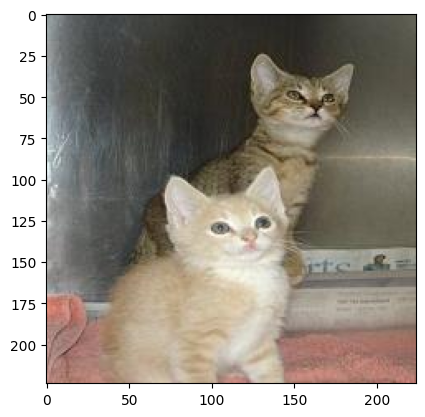

In [25]:
img_path=r"D:\Deep Learning\Projects\Datasets\Cat_Dog_resized\cat.27.jpg"
# Read the image
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.show()

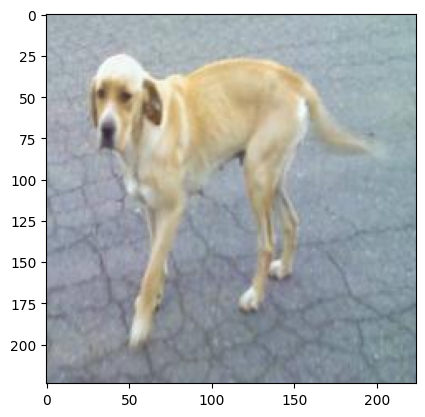

In [26]:
img_path = r"D:\Deep Learning\Projects\Datasets\Cat_Dog_resized\dog.3314.jpg"

# Read the image
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.show()

In [27]:
filenames = os.listdir("D:\Deep Learning\Projects\Datasets\Cat_Dog_resized")


labels = []

for i in range(8000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [17]:
print(labels[0])

0


In [35]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[4000 4000]


In [28]:
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
tf.random.set_seed(3)
import glob

In [38]:
resized_folder = "D:/Deep Learning/Projects/Datasets/Cat_Dog_resized"
image_extension = ['png', 'jpg']
files = []

[files.extend(glob.glob(resized_folder + '*.' + e)) for e in image_extension]

dog_cat_images = np.array([cv2.imread(file) for file in files])

In [57]:
from PIL import Image
import numpy as np
import os

# Define the path to the image directory
original_folder = "D:/Deep Learning/Projects/Datasets/Cat_Dog/"
resized_folder = "D:/Deep Learning/Projects/Datasets/Cat_Dog_resized"

# Create the resized folder if it doesn't exist
if not os.path.exists(resized_folder):
    os.makedirs(resized_folder)

# Parameters
new_size = (224, 224)  # Target size for resizing images

# Initialize lists to hold image data and labels
image_data = []
labels = []

# Get the list of image files
all_files = os.listdir(original_folder)

# Ensure we have at least 4000 files
if len(all_files) < 2000:
    raise ValueError("Not enough files in the directory to select 2000 first and 2000 last files.")

# Select the first 1000 and the last 1000 files
selected_files = all_files[:1000] + all_files[-1000:]

# Process each selected image
for i, file_name in enumerate(selected_files):
    # Construct the full file path
    img_path = os.path.join(original_folder, file_name)
    
    # Check if it's a file (and not a directory)
    if os.path.isfile(img_path):
        # Open the image file
        img = Image.open(img_path)
        
        # Resize the image to the target size
        img_resized = img.resize(new_size)
        
        # Convert the image to RGB (if it's not already in RGB mode)
        img_rgb = img_resized.convert('RGB')
        
        # Convert the image to a numpy array and normalize pixel values to the range [0, 1]
        img_array = np.array(img_rgb) / 255.0
        
        # Append the image array to the image data list
        image_data.append(img_array)
        
        # Use the file naming convention to determine the label
        # Assuming file_name contains 'cat' or 'dog' in its name
        if 'cat' in file_name.lower():
            labels.append(0)  # Label for cat
        elif 'dog' in file_name.lower():
            labels.append(1)  # Label for dog
        
        # Save the resized image to the resized folder
        new_img_path = os.path.join(resized_folder, file_name)
        img_resized.save(new_img_path)

# Convert the lists to numpy arrays
X = np.array(image_data)
Y = np.array(labels)

# Verify the shapes of the arrays
print("Shape of X:", X.shape)  # Should be (num_samples, 224, 224, 3)
print("Shape of Y:", Y.shape)  # Should be (num_samples,)


Shape of X: (2000, 224, 224, 3)
Shape of Y: (2000,)


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [59]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [60]:
print(X_train)

[[[[0.69411765 0.61176471 0.49803922]
   [0.70196078 0.61960784 0.50588235]
   [0.70588235 0.62352941 0.50588235]
   ...
   [0.4627451  0.38823529 0.33333333]
   [0.44705882 0.37254902 0.31764706]
   [0.43921569 0.36470588 0.30980392]]

  [[0.67843137 0.59607843 0.48235294]
   [0.68627451 0.60392157 0.49019608]
   [0.68627451 0.60392157 0.48627451]
   ...
   [0.45098039 0.37647059 0.32156863]
   [0.43921569 0.36470588 0.30980392]
   [0.43137255 0.35686275 0.30196078]]

  [[0.68627451 0.60392157 0.49019608]
   [0.68627451 0.60392157 0.49019608]
   [0.68627451 0.60392157 0.48627451]
   ...
   [0.45490196 0.38039216 0.3254902 ]
   [0.44705882 0.37254902 0.31764706]
   [0.43921569 0.36470588 0.30980392]]

  ...

  [[0.39215686 0.37647059 0.38039216]
   [0.24705882 0.22745098 0.24705882]
   [0.30588235 0.29019608 0.31764706]
   ...
   [0.56470588 0.70196078 0.90588235]
   [0.55294118 0.66666667 0.91764706]
   [0.4        0.48627451 0.75294118]]

  [[0.40784314 0.4        0.40784314]
   [0.2

In [67]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the pre-trained model MobileNetV2 without the top layer
pretrained_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Define the number of output classes
num_of_classes = 2

# Create a Sequential model
model = tf.keras.Sequential([
    pretrained_model,  # Add the pre-trained model as the base
    GlobalAveragePooling2D(),  # Add a global average pooling layer to reduce the feature dimensions
    Dense(num_of_classes, activation='softmax')  # Add a dense layer with softmax activation for classification
])

# Print the model summary
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 16s 2us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ ?                           │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [69]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [70]:
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 440ms/step - acc: 0.8952 - loss: 0.2597
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 412ms/step - acc: 0.9764 - loss: 0.0564
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 405ms/step - acc: 0.9818 - loss: 0.0396
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 407ms/step - acc: 0.9906 - loss: 0.0288
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 417ms/step - acc: 0.9957 - loss: 0.0220


In [71]:
score, acc = model.evaluate(X_test, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 391ms/step - acc: 0.9695 - loss: 0.0868
Test Loss = 0.07104402780532837
Test Accuracy = 0.9750000238418579


Path of the image to be predicted:  "D:\Deep Learning\Projects\Datasets\training_set\cats\cat.267.jpg"


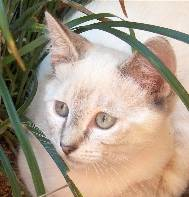

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.37001428 0.6299857 ]]
1
The image represents a Cat


In [93]:
input_image_path = input('Path of the image to be predicted: ').strip()
image_path = os.path.normpath(input_image_path.strip('"'))
input_image = Image.open(image_path)
        
# Resize the image to the size expected by the model (224x224 pixels)
input_image_resize = input_image.resize((224, 224))

#showtheimage
img = Image.open(image_path)
# Display the image
display(img)


# Convert the image to RGB (if it's not already in RGB mode)
input_image_rgb = input_image_resize.convert('RGB')
        
# Convert the image to a numpy array and normalize pixel values to the range [0, 1]
input_image_array = np.array(input_image_rgb) / 255.0
        
# Reshape the image to the shape expected by the model: (1, 224, 224, 3)
image_reshaped = np.reshape(input_image_array, [1, 224, 224, 3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Dog')

else:
  print('The image represents a Cat')